# Principal Component Analysis with Cancer Data

In [146]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [147]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [178]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [248]:


x = df.drop(['ID'],axis=1)
y= df['Class']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [249]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [250]:
# We could see "?" values in column, this should be removed from data set
x_mod = x.drop(x[x['Bare Nuclei'] == '?'].index  )
x_mod.shape
# Check for missing value in any other column
#Checking for any other missing values and drop the rows
x_mod =x_mod.dropna() 
x_mod.shape


(683, 10)

In [251]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
x['Bare Nuclei'][x['Bare Nuclei'] == '?'].count()

16

In [252]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
x = x.replace('?', np.nan)
#replacing ? with mean
x = x.apply(lambda x: x.fillna(x.median()),axis=0)
#replacing ? with mode
x = x.apply(lambda x: x.fillna(x.mode()),axis=0)


In [253]:
x[x.duplicated()== True].count()

ClumpThickness                 236
Cell Size                      236
Cell Shape                     236
Marginal Adhesion              236
Single Epithelial Cell Size    236
Bare Nuclei                    236
Normal Nucleoli                236
Bland Chromatin                236
Mitoses                        236
Class                          236
dtype: int64

# Q4. Perform bi variate analysis including correlation & pairplots. 


In [254]:
# Check for correlation of variable
x_mod.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Normal Nucleoli,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
Bland Chromatin,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


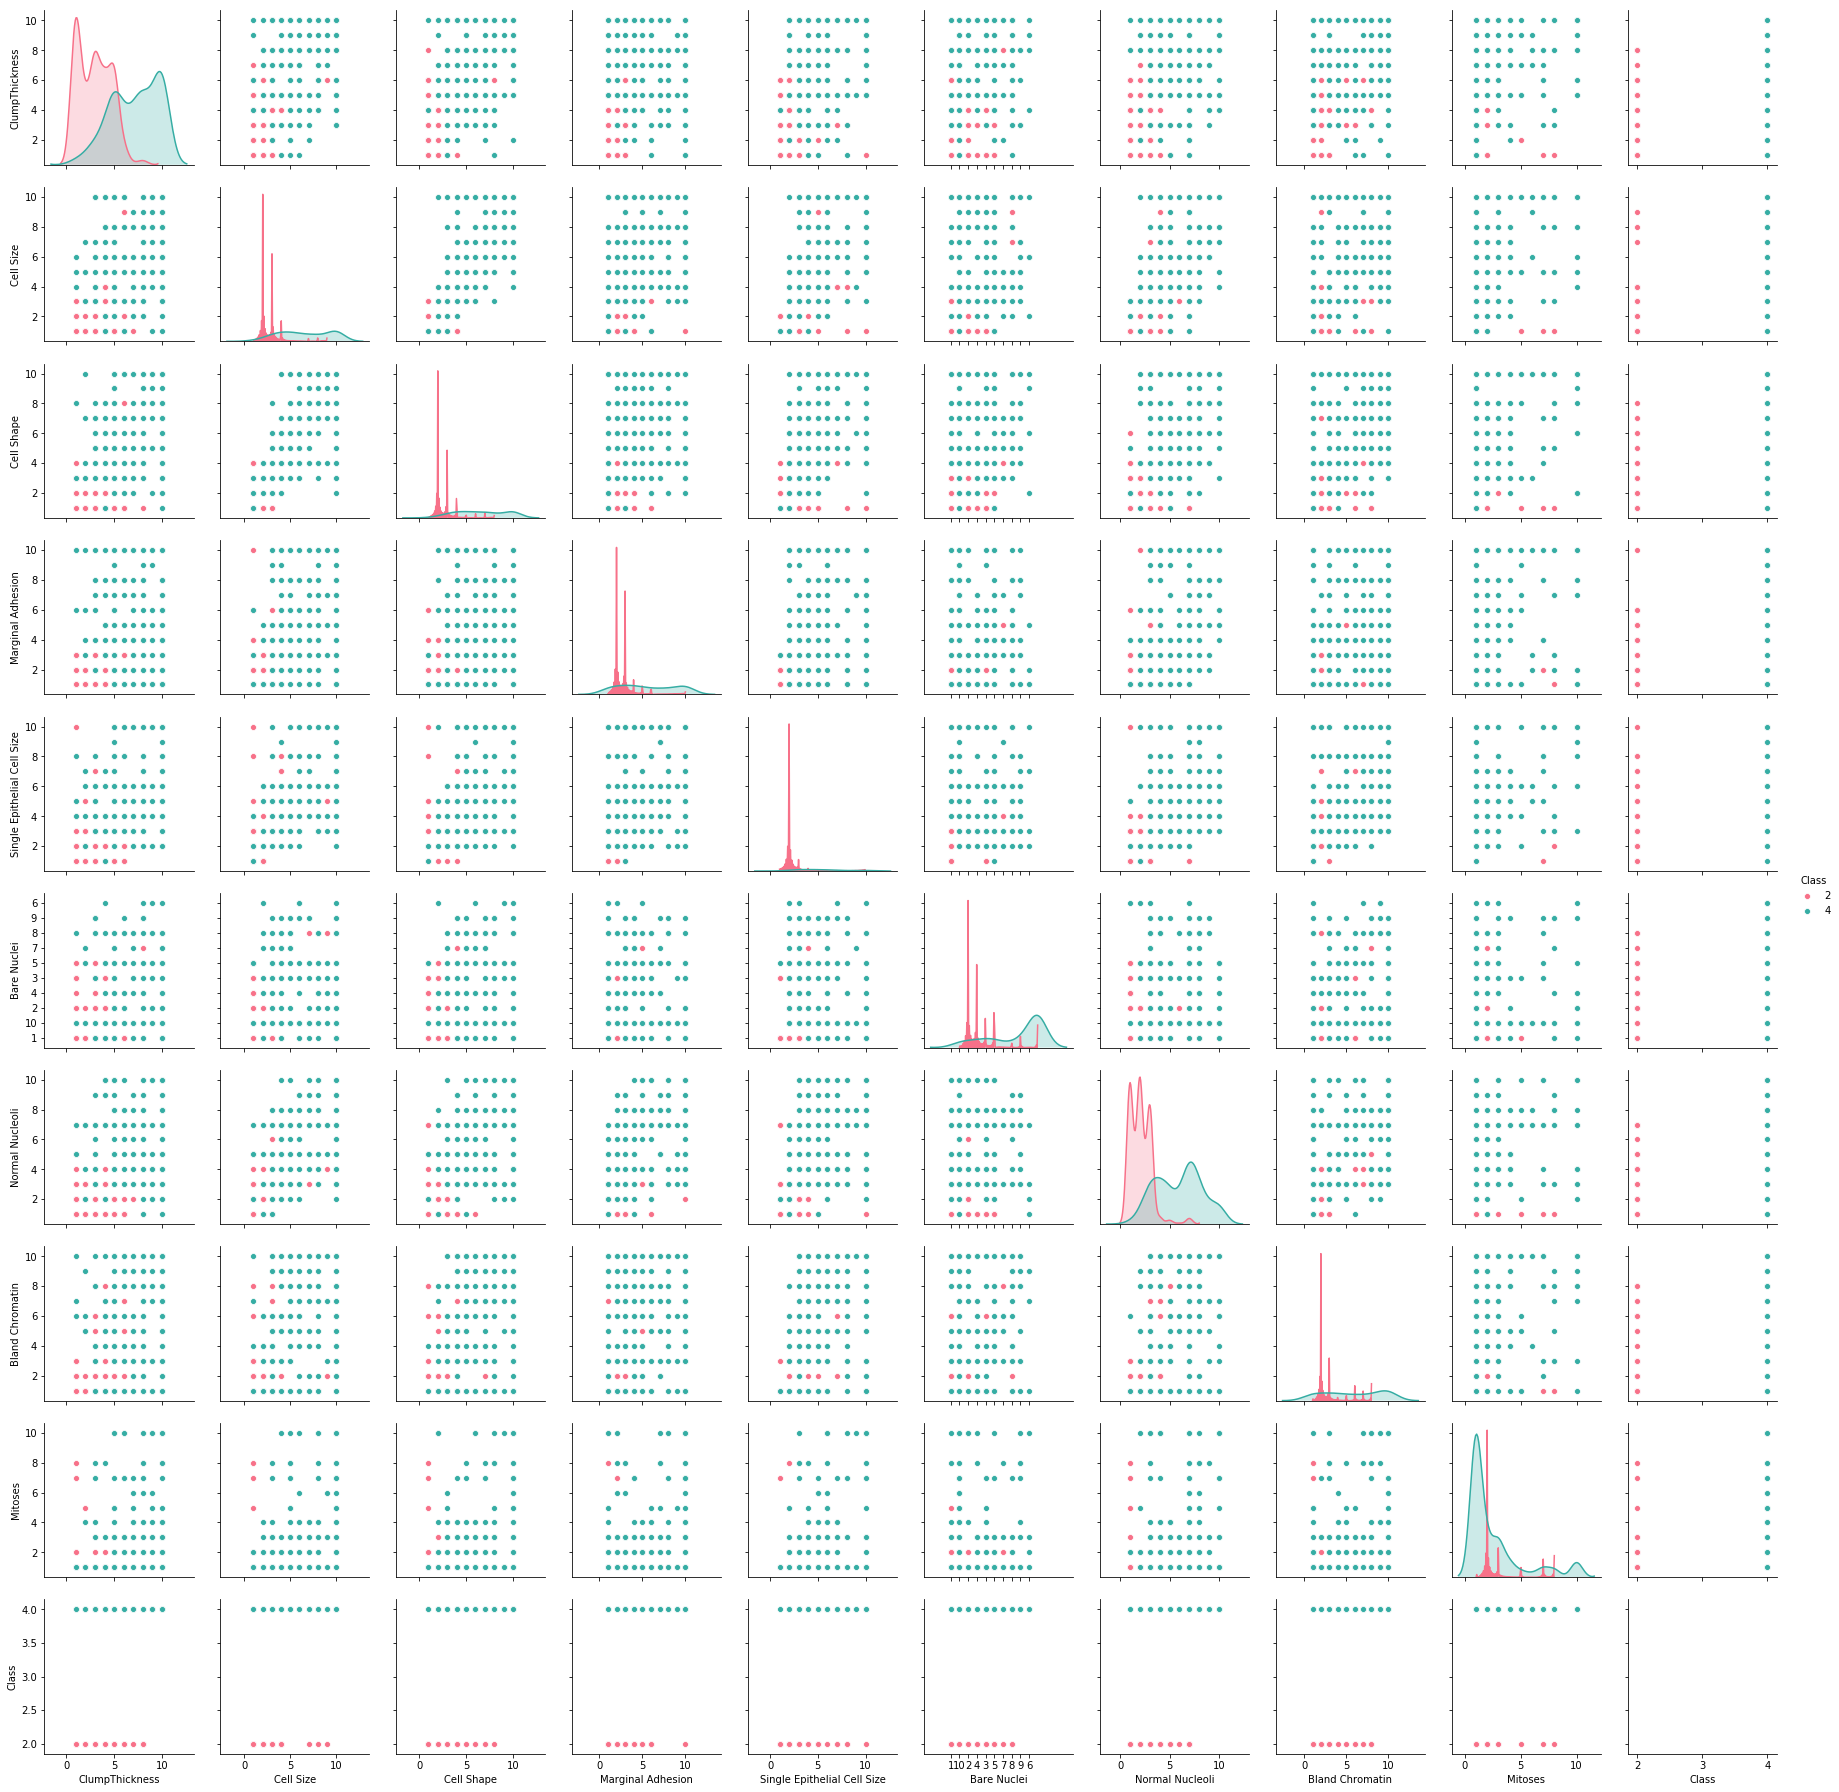

In [255]:

import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(x_mod,hue= 'Class' ,palette='husl') 

In [256]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [257]:
#Let us check for pair plots

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 78.7 KB


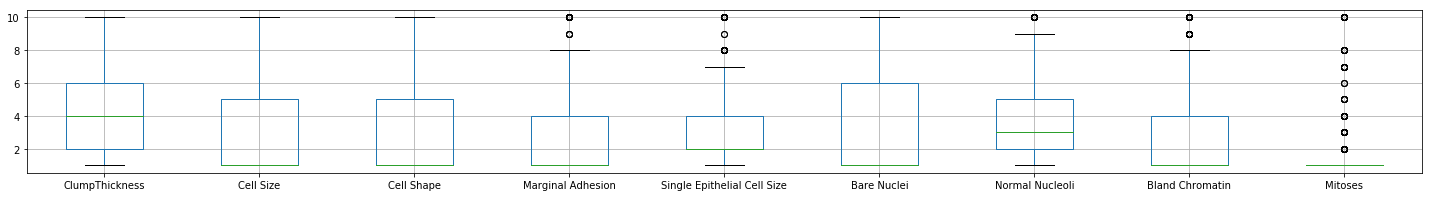

In [258]:
# We could see most of the outliers are now removed.
x_mod['Bare Nuclei'] = x_mod['Bare Nuclei'].astype('int')
x_mod.info()
x_mod2 = x_mod.drop(['Class'], axis =1)
x_mod2.boxplot(figsize=(25,3))

In [259]:
import matplotlib.pylab as plt
#x.mod['Class'] = y
#x_mod.boxplot(by = 'Class',  layout=(3,3), figsize=(15, 10))
x_mod['Bare Nuclei'] = x_mod['Bare Nuclei'].astype('int')
x_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 78.7 KB


# Q6 Create a covariance matrix for identifying Principal components

In [260]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(x_mod2)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)


Covariance Matrix 
 [[1.00146628 0.64342355 0.65442815 0.48854401 0.52436377 0.59396107
  0.55455439 0.534849   0.35147177]
 [0.64342355 1.00146628 0.90855848 0.70801357 0.75464892 0.69272299
  0.75666702 0.7204008  0.46143029]
 [0.65442815 0.90855848 1.00146628 0.68695385 0.72352174 0.71492429
  0.73642172 0.71901615 0.44190459]
 [0.48854401 0.70801357 0.68695385 1.00146628 0.59541954 0.67163165
  0.66954737 0.6040054  0.41951256]
 [0.52436377 0.75464892 0.72352174 0.59541954 1.00146628 0.58657495
  0.61903424 0.62984858 0.48128796]
 [0.59396107 0.69272299 0.71492429 0.67163165 0.58657495 1.00146628
  0.68161283 0.58513691 0.33970781]
 [0.55455439 0.75666702 0.73642172 0.66954737 0.61903424 0.68161283
  1.00146628 0.66657749 0.34651824]
 [0.534849   0.7204008  0.71901615 0.6040054  0.62984858 0.58513691
  0.66657749 1.00146628 0.43439328]
 [0.35147177 0.46143029 0.44190459 0.41951256 0.48128796 0.33970781
  0.34651824 0.43439328 1.00146628]]


# Q7 Identify eigen values and eigen vector

In [261]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-3.02062573e-01 -1.40800531e-01  8.66372452e-01  2.74743825e-03
   1.07828438e-01  8.03212439e-02 -2.47707288e-01  2.42517517e-01
  -8.51566756e-03]
 [-3.80792973e-01 -4.66403106e-02 -1.99378011e-02  7.33210938e-01
  -2.04255399e-01 -1.45652870e-01  4.36299814e-01  1.39031681e-01
  -2.05434260e-01]
 [-3.77582540e-01 -8.24224677e-02  3.35108706e-02 -6.67480798e-01
  -1.75865604e-01 -1.08391546e-01  5.82726744e-01  7.45271259e-02
  -1.27209198e-01]
 [-3.32723572e-01 -5.20943760e-02 -4.12647341e-01 -4.60192106e-02
   4.93172568e-01 -1.95689775e-02 -1.63434032e-01  6.54628771e-01
   1.23830400e-01]
 [-3.36234038e-01  1.64404385e-01 -8.77425288e-02 -6.68906225e-02
  -4.27383577e-01 -6.36693247e-01 -4.58669096e-01 -6.93089143e-02
   2.11018210e-01]
 [-3.35067511e-01 -2.61260621e-01  6.91477953e-04  7.65102933e-02
   4.98617672e-01 -1.24772942e-01  1.26652879e-01 -6.09220540e-01
   4.02790095e-01]
 [-3.45747366e-01 -2.28076759e-01 -2.13071845e-01 -6.22410470e-02
   1.3047338

# Q8 Find variance and cumulative variance by each eigen vector

In [262]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [263]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.54999277  74.17162483  80.16331638  85.2702881   89.49557508
  92.84975787  96.12089914  99.01796423 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [264]:
eigenvalues = eig_vals
eigenvectors = eig_vecs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(x_mod2,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  #

[(5.908149641714726, array([-0.30206257, -0.38079297, -0.37758254, -0.33272357, -0.33623404,
       -0.33506751, -0.34574737, -0.33559138, -0.2302064 ])), (0.7770846371660424, array([-0.14080053, -0.04664031, -0.08242247, -0.05209438,  0.16440439,
       -0.26126062, -0.22807676,  0.03396582,  0.90555729])), (0.5400429320713802, array([ 8.66372452e-01, -1.99378011e-02,  3.35108706e-02, -4.12647341e-01,
       -8.77425288e-02,  6.91477953e-04, -2.13071845e-01, -1.34248356e-01,
        8.04921698e-02])), (0.4603013949329088, array([ 0.10782844, -0.2042554 , -0.1758656 ,  0.49317257, -0.42738358,
        0.49861767,  0.01304734, -0.41711347,  0.25898781])), (0.3808334179016655, array([ 0.08032124, -0.14565287, -0.10839155, -0.01956898, -0.63669325,
       -0.12477294,  0.22766572,  0.69021015,  0.10504168])), (0.3023190850185576, array([ 0.24251752,  0.13903168,  0.07452713,  0.65462877, -0.06930891,
       -0.60922054, -0.29889733, -0.0215182 , -0.14834515])), (0.2948343902356466, array(

In [265]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%



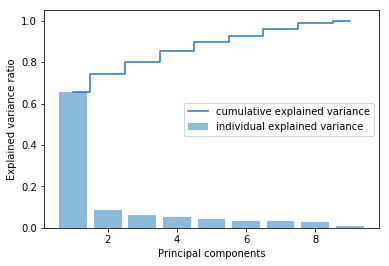

In [266]:
import matplotlib.pyplot as plt 
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [267]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 9 to 4 dimension space

X_std_4D = np.dot(x_mod2,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

# Q10 Find correlation between components and features

In [268]:
Proj_data_df  = Proj_data_df.join(y)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


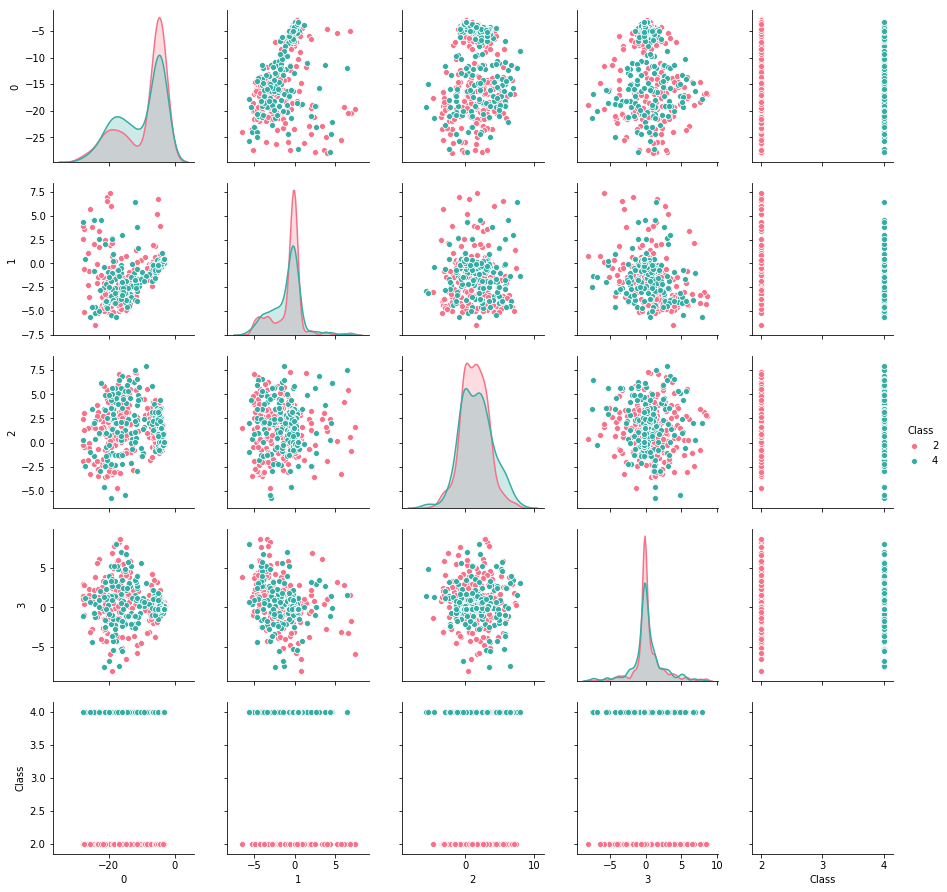

In [269]:
sns.pairplot(Proj_data_df,hue="Class", palette="husl")